In [26]:
!pip install matplotlib
! pip install numpy

In [27]:
import json

# Open the JSON file
with open('output.json', 'r') as json_file:
    # Load the JSON data
    data = json.load(json_file)

alephLos = []
alephHis = []
expectedreturn = []

print(data)



# Access the data
for element in data:
    expectedreturn.append(element['value1'])
    alephLos.append(element['value2'])
    alephHis.append(element['value3'])





[{'key1': 'expectedIndicator', 'value1': 0.7, 'key2': 'alephLo', 'value2': 0.2, 'key3': 'alephHi', 'value3': 1.2}, {'key1': 'expectedIndicator', 'value1': 0.7999999999999998, 'key2': 'alephLo', 'value2': 0.2, 'key3': 'alephHi', 'value3': 1.4}, {'key1': 'expectedIndicator', 'value1': 0.8999999999999998, 'key2': 'alephLo', 'value2': 0.2, 'key3': 'alephHi', 'value3': 1.6}, {'key1': 'expectedIndicator', 'value1': 0.9999999999999994, 'key2': 'alephLo', 'value2': 0.2, 'key3': 'alephHi', 'value3': 1.8}, {'key1': 'expectedIndicator', 'value1': 0.9027190660252813, 'key2': 'alephLo', 'value2': 0.2, 'key3': 'alephHi', 'value3': 2}, {'key1': 'expectedIndicator', 'value1': 0.8000000000000004, 'key2': 'alephLo', 'value2': 0.4, 'key3': 'alephHi', 'value3': 1.2}, {'key1': 'expectedIndicator', 'value1': 0.8999999999999997, 'key2': 'alephLo', 'value2': 0.4, 'key3': 'alephHi', 'value3': 1.4}, {'key1': 'expectedIndicator', 'value1': 0.9999999999999994, 'key2': 'alephLo', 'value2': 0.4, 'key3': 'alephHi', 

## Do a 3D plot of the expected return

C:\Users\David\AppData\Local\Temp\ipykernel_11884\958218491.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_flat, y_flat, z_flat, c= colors, cmap='viridis')


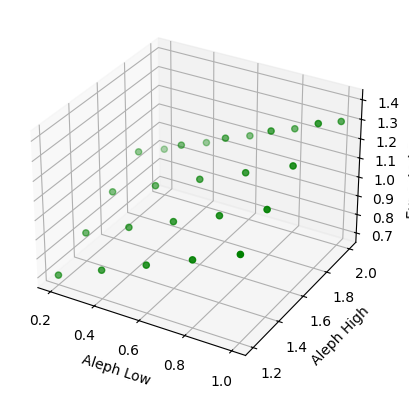

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 5x5 grid of values (you can replace this with your data)
grid_values = np.random.rand(5, 5)

# Create a mesh grid for x and y values
x, y = np.array(alephLos), np.array(alephHis)

# Flatten the grid and corresponding values
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = np.array(expectedreturn).reshape(25,)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = np.where((z_flat >= x_flat) & (z_flat <= y_flat), 'green', 'red')


# Scatter plot for each combination of values
ax.scatter(x_flat, y_flat, z_flat, c= colors, cmap='viridis')

# Set labels for axes
ax.set_xlabel('Aleph Low')
ax.set_ylabel('Aleph High')
ax.set_zlabel('Expected Return')

# Show the plot
plt.show()


## Now we fix a specific aleph, and rotate lambda max.



In [29]:
with open('output_rotatemaxLambda.json', 'r') as json_file:
    # Load the JSON data
    data = json.load(json_file)

aleph0 = 1.2
maxLambda = []
expectedreturn = []

print(data)



# Access the data
for element in data:
    expectedreturn.append(element['value1'])
    maxLambda.append(element['value3'])

[{'key1': 'expectedIndicator', 'value1': -0.24783615999999997, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'maxLambda', 'value3': 0.6}, {'key1': 'expectedIndicator', 'value1': -0.09853003062499993, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'maxLambda', 'value3': 0.65}, {'key1': 'expectedIndicator', 'value1': 0.05078202000000007, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'maxLambda', 'value3': 0.7}, {'key1': 'expectedIndicator', 'value1': 0.4341186523437498, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'maxLambda', 'value3': 0.75}, {'key1': 'expectedIndicator', 'value1': 0.7017459200000008, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'maxLambda', 'value3': 0.8}, {'key1': 'expectedIndicator', 'value1': 0.9711826865625002, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'maxLambda', 'value3': 0.85}, {'key1': 'expectedIndicator', 'value1': 1.2000000000000002, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'maxLambda', 'value3': 0.9}, {'key1': 'expectedIndicator', 'value1': 1.2000000000000002, 'key2': 'aleph0', 'va

In [30]:
print(aleph0)

1.2


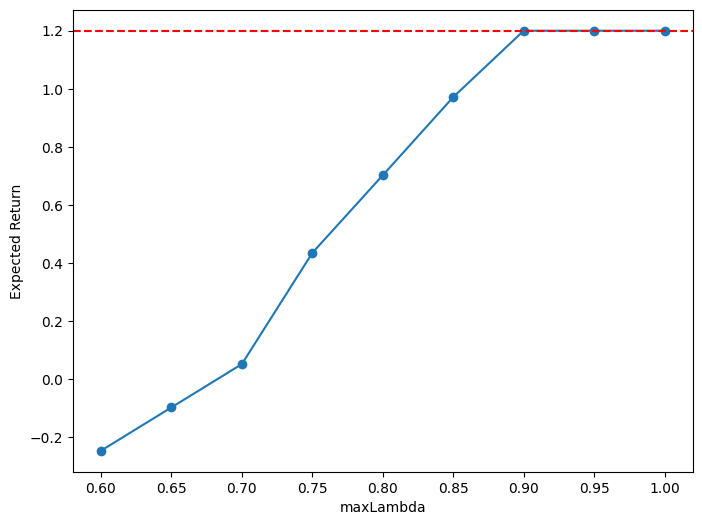

In [31]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(maxLambda, expectedreturn, marker='o', linestyle='-')

# Add a diagonal line representing the target value
plt.axhline(aleph0, color='red', linestyle='--', label='Aleph0')
plt.xlabel("maxLambda")
plt.ylabel("Expected Return")
plt.show()


## Now we fix a specific aleph, and rotate lambda min.

In [32]:
with open('output_rotateminLambda.json', 'r') as json_file:
    # Load the JSON data
    data = json.load(json_file)

aleph0 = 1.2
minlambda = []
expectedreturn = []

print(data)



# Access the data
for element in data:
    expectedreturn.append(element['value1'])
    minlambda.append(element['value3'])

[{'key1': 'expectedIndicator', 'value1': 1.1999999999999993, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'minlambda', 'value3': 0}, {'key1': 'expectedIndicator', 'value1': 1.1999999999999997, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'minlambda', 'value3': 0.05}, {'key1': 'expectedIndicator', 'value1': 1.1999999999999997, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'minlambda', 'value3': 0.1}, {'key1': 'expectedIndicator', 'value1': 1.1999999999999997, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'minlambda', 'value3': 0.15}, {'key1': 'expectedIndicator', 'value1': 1.1999999999999997, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'minlambda', 'value3': 0.2}, {'key1': 'expectedIndicator', 'value1': 1.1999999999999997, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'minlambda', 'value3': 0.25}, {'key1': 'expectedIndicator', 'value1': 1.199999999999998, 'key2': 'aleph0', 'value2': 1.2, 'key3': 'minlambda', 'value3': 0.3}, {'key1': 'expectedIndicator', 'value1': 1.1999999999999997, 'key2': 'aleph0', 'value2': 1

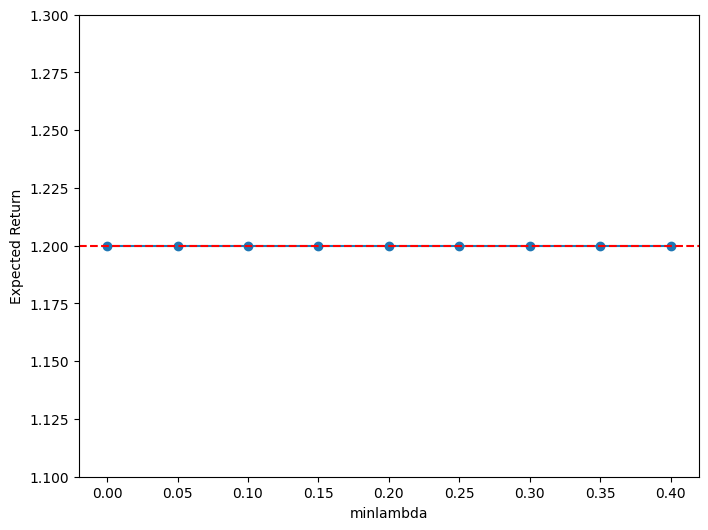

In [35]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(minlambda, expectedreturn, marker='o', linestyle='-')

# Add a diagonal line representing the target value
plt.axhline(aleph0, color='red', linestyle='--', label='Aleph0')
plt.xlabel("minlambda")
plt.ylabel("Expected Return")
plt.ylim(min(expectedreturn) - 0.1, max(expectedreturn) + 0.1)  # Adjust the limits as needed
plt.show()


In [34]:
print(expectedreturn)

[1.1999999999999993, 1.1999999999999997, 1.1999999999999997, 1.1999999999999997, 1.1999999999999997, 1.1999999999999997, 1.199999999999998, 1.1999999999999997, 1.2000000000000002]
